In [1]:
import pandas as pd
import os
import glob
from google.cloud import storage
from sklearn.preprocessing import MultiLabelBinarizer
# get current working directory: /Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership/
os.getcwd()

'/Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership'

### NOTE：need to create a new folder under the current working directory to store downloaded csv files

In [12]:
# NOTE：need to create a new folder under the current working directory to store downloaded csv files
output_folder = '/Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership/'
# output_folder = 'path_to_your_newly_created_folder/'

### Download data from gcs and read into Dataframe (FYI take a few minutes)

In [13]:
input_bucket = 'amlg-dev'
file_prefix_pattern = 'clustering_sample_data190225_190304_one_hotted'

# load the data from gcs, transform into df
def init_storage_client():
    storage_client = storage.Client()
    return storage_client

def download_blob(storage_client, bucket_name, file_prefix_pattern, output_folder):
    """Downloads a blob from the bucket."""
    bucket = storage_client.get_bucket(bucket_name)
    blobs = list_blobs(bucket, file_prefix_pattern)
    destination_file_names = []
    for blob in blobs:
        destination_file_name = f'{output_folder}{blob.name}'
        blob.download_to_filename(destination_file_name)
        destination_file_names.append(destination_file_name)
        print(f'Blob {blob} downloaded to {destination_file_name}.')

def list_blobs(storage_bucket, file_prefix_pattern):
    """Lists all the blobs in the bucket."""
    blobs = storage_bucket.list_blobs(prefix=file_prefix_pattern)
    return blobs

def build_data_df(output_folder, file_prefix_pattern):
    csv_paths = glob.glob(f'{output_folder}{file_prefix_pattern}*.csv')
    df = pd.DataFrame()
    for p in csv_paths:
        data = pd.read_csv(p)
        df = df.append(data)
    return df

input_bucket = 'amlg-dev'
storage_client = init_storage_client()
download_blob(storage_client, input_bucket, file_prefix_pattern, output_folder)
data_df = build_data_df(output_folder, file_prefix_pattern)

Blob <Blob: amlg-dev, clustering_sample_data190225_190304_one_hotted000000000000.csv> downloaded to /Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership/clustering_sample_data190225_190304_one_hotted000000000000.csv.
Blob <Blob: amlg-dev, clustering_sample_data190225_190304_one_hotted000000000001.csv> downloaded to /Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership/clustering_sample_data190225_190304_one_hotted000000000001.csv.
Blob <Blob: amlg-dev, clustering_sample_data190225_190304_one_hotted000000000002.csv> downloaded to /Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership/clustering_sample_data190225_190304_one_hotted000000000002.csv.
Blob <Blob: amlg-dev, clustering_sample_data190225_190304_one_hotted000000000003.csv> downloaded to /Users/rpeng1012/Desktop/Jupyter files/All_Access_user_viewership/clustering_sample_data190225_190304_one_hotted000000000003.csv.
Blob <Blob: amlg-dev, clustering_sample_data190225_190304_one_hotted000000000004

### Take a look at user dataset we have

In [17]:
data_df.shape

(2726561, 137)

In [18]:
data_df.head()

,user_id,cbs_show_id,show_10,show_106,show_179,show_352,show_393,show_617,show_618,show_5623,...,show_61456436,show_61456437,show_61456441,show_61456442,show_61456467,show_61456470,show_61456471,show_61456472,show_61456473,show_61456474
0,19409321,6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19409321,25319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19409367,61456410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19409367,61456341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19409367,61456261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# need to generate the SQL query for one-hot encoding with BQ
# unique_show_ids = [int(i) for i in list(set(data_df['cbs_show_id'].dropna().unique().tolist()))]
# unique_show_ids.sort()
# for show_id in unique_show_ids:
#     print(f'(case when cbs_show_id = {show_id} then progress_sum else 0 end) as show_{show_id},')

In [19]:
agg_view_by_user_data = data_df.drop(columns=['cbs_show_id']).groupby('user_id').sum().reset_index()
agg_view_by_user_data.head()

,user_id,show_10,show_106,show_179,show_352,show_393,show_617,show_618,show_5623,show_5692,...,show_61456436,show_61456437,show_61456441,show_61456442,show_61456467,show_61456470,show_61456471,show_61456472,show_61456473,show_61456474
0,461,0.0,0.0,0.0,0.0,0.0,4.25,5.68,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,888,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,2.37,0.0,0.0,0.0,0.0,0.0,0.0
2,992,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,1212,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,1669,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,1.47,0.0,0.0,0.0,0.0,0.0,0.0


### some info about weekly content consumption for each user in the dataset

In [22]:
watch_count_each_user = agg_view_by_user_data.drop(columns='user_id').astype(bool).sum(axis=1)
watch_count_each_user.head()

0     6
1     8
2     2
3     4
4    12
dtype: int64

In [21]:
watch_count_each_user.describe()
# our user on average has 2.6 viewing records per week

count    1.022393e+06
mean     2.666842e+00
std      2.302020e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.800000e+01
dtype: float64

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import requests
warnings.filterwarnings('ignore')

### Correlation between shows (take a while to calculate the correlation)
The lighter the square, the stronger the correlation, (cor range from 0 - 1)  
The white diagonal line is show's correlation with itself, so it's completely white (cor = 1)

Text(0.5,1,'Show Viewership Correlation - 1 week(2019-02-25~2019-03-04)')

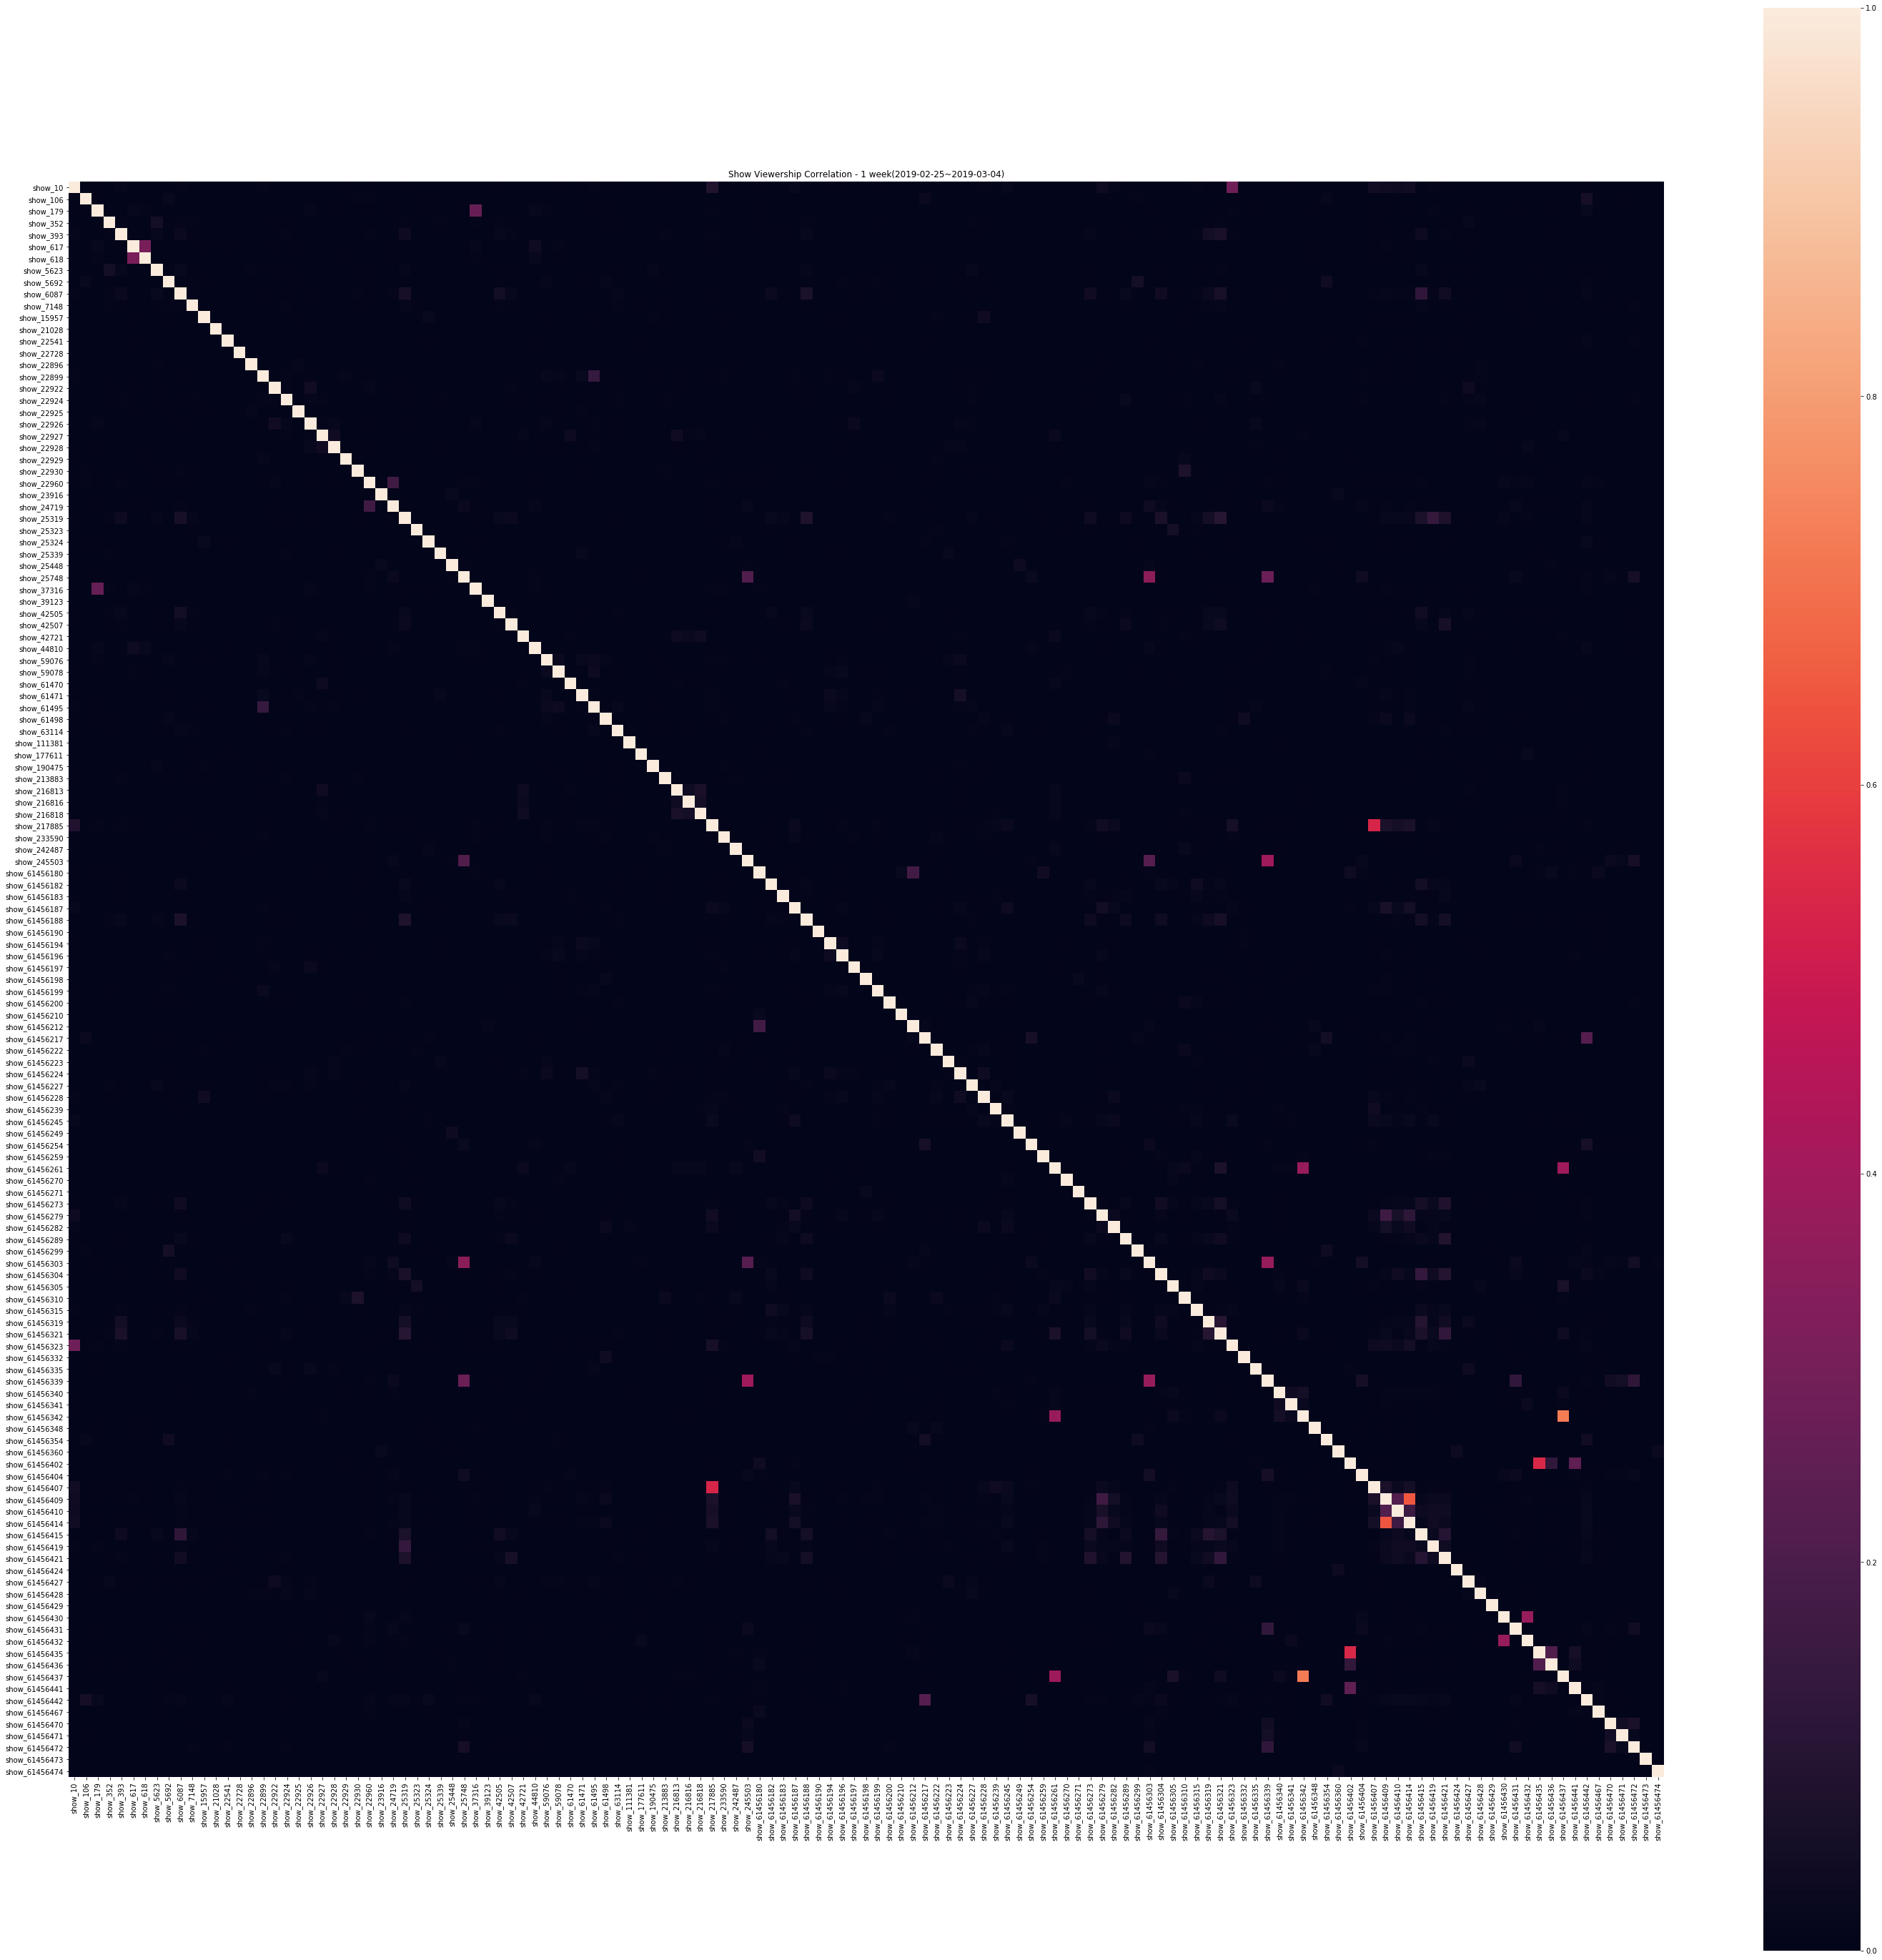

In [24]:
show_viewership_df = agg_view_by_user_data.drop(columns=['user_id'])#Subsetting the data
cor = show_viewership_df.corr() #Calculate the correlation of the above variables
plt.figure(figsize=(50,50))
sns.heatmap(cor, square = True, vmin=0, vmax=1) 
plt.title('Show Viewership Correlation - 1 week(2019-02-25~2019-03-04)')

### K-means clustering
Num of cluster will be the number of groups you think the data should split into.  
Each user will only fall into 1 group.
If cluster number is large, calculation will take more time. Also depends on num of data points(i.e.users).

In [25]:
num_cluster = 7

In [26]:
# Kmeans clustering
def doKmeans(X, nclust=6):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(show_viewership_df, num_cluster)
kmeans = pd.DataFrame(clust_labels)
show_viewership_df = agg_view_by_user_data.drop(columns=['user_id'])
show_viewership_df.insert((show_viewership_df.shape[1]),'kmeans',kmeans)

### Popular shows within each group

In [27]:
groupby_class_df = show_viewership_df.groupby('kmeans').sum()
top_watched_shows = pd.DataFrame()
for i in range(num_cluster):
    top_watched_shows[f'group_{i}'] = groupby_class_df.iloc[i].sort_values(ascending=False).index.tolist()
    top_watched_shows[f'group_{i}'] = [int(showname.split('show_')[-1]) for showname in top_watched_shows[f'group_{i}']]
    top_watched_shows[f'group_{i}_score'] = groupby_class_df.iloc[i].sort_values(ascending=False).values
# display top 10 shows
top_watched_shows.head(10)

,group_0,group_0_score,group_1,group_1_score,group_2,group_2_score,group_3,group_3_score,group_4,group_4_score,group_5,group_5_score,group_6,group_6_score
0,6087,205930.84,61456261,682562.95,106,134705.49,6087,96460.54,618,25780.88,42507,202363.83,61456196,38691.48
1,61456188,14255.86,617,312543.44,5692,2984.88,61456188,2062.84,617,4270.12,61456321,4348.77,61456194,744.08
2,42505,13759.16,6087,296350.75,61456217,1244.26,42505,1791.14,61456414,171.39,61456188,3426.44,61456199,494.62
3,61456415,12766.88,61456273,274073.30,22960,983.09,61456321,1565.20,61456409,140.52,6087,3396.30,61456279,400.94
4,61456321,12553.85,61456188,251970.63,61456261,974.89,61456415,1352.66,22960,120.38,61456421,2433.59,5692,341.34
5,61456273,7561.52,61456415,249134.09,6087,798.08,42507,744.94,37316,115.07,61456289,2254.71,59078,325.85
6,61456261,5927.83,10,230432.53,61456273,721.22,61456273,744.73,106,98.79,42505,2142.38,22926,245.88
7,61456182,4506.36,42507,224957.33,61456414,614.62,61456261,540.88,61456261,91.19,61456273,1674.13,6087,238.75
8,42507,4369.80,106,221911.92,61456442,595.71,25319,436.34,10,73.99,61456261,1617.31,59076,218.21
9,25319,4253.10,61456321,205876.65,61456321,570.77,61456182,419.01,217885,71.35,61456415,1462.94,10,203.28


In [28]:
def get_show_name():
    r = requests.get(
            "http://api.www.cbs.com/api/v2.0/shows/groups.json?includeAllShowGroups=true",
            timeout=120,
        )
    resp = r.json()
    df = pd.DataFrame({'show_id':[i['showId'] for i in resp['all']],
                                    'show_name':[i['title'] for i in resp['all']]}).drop_duplicates(keep='first')
    return df
show_mapping_df = get_show_name()

In [29]:
def group_analysis(group_index=0, top_N=10):
    df = top_watched_shows[[f'group_{group_index}', f'group_{group_index}_score']].iloc[0:top_N].merge(show_mapping_df, 
                                                               how ='left',
                                                               left_on=f'group_{group_index}', right_on='show_id')
    df = df.drop(columns='show_id')
    df = df.rename(
        {'show_name':f'group_{group_index}_show_name', 
         f'group_{group_index}': f'group_{group_index}_show_id'
        }, axis = 1)
    df = df[[f'group_{group_index}_show_name', f'group_{group_index}_show_id', f'group_{group_index}_score']]
    return df

### Display popular show for a given group

In [30]:
# e.g. Top 10 shows for group 1
group_analysis(1, 10)

,group_1_show_name,group_1_show_id,group_1_score
0,Star Trek: Discovery,61456261,682562.95
1,The Young and the Restless,617,312543.44
2,NCIS,6087,296350.75
3,Bull,61456273,274073.30
4,NCIS: New Orleans,61456188,251970.63
5,FBI,61456415,249134.09
6,The Big Bang Theory,10,230432.53
7,Hawaii Five-0,42507,224957.33
8,Survivor,106,221911.92
9,SEAL Team,61456321,205876.65


In [52]:
# e.g. Top 20 shows for group 0
group_analysis(0, 5)

,group_0_show_name,group_0_show_id,group_0_score
0,NCIS,6087,205930.84
1,NCIS: New Orleans,61456188,14255.86
2,Blue Bloods,42505,13759.16
3,FBI,61456415,12766.88
4,SEAL Team,61456321,12553.85


### Visualization for each group of users

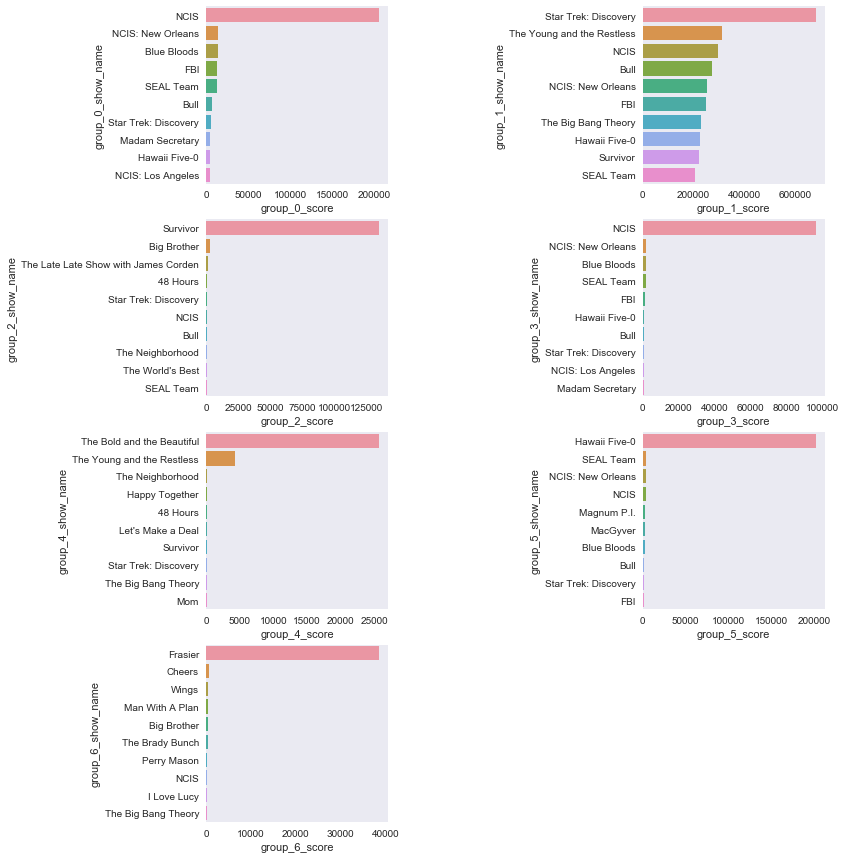

In [33]:
import seaborn as sns
sns.set(style="dark")
sns.despine(left=True)
plt.figure(figsize=(15,15))
for i in range(0,num_cluster):
    plt.subplot(4, 4, 2*i + 1)
    ax = sns.barplot(y=f"group_{i}_show_name", x=f"group_{i}_score", data=group_analysis(i, 10))

### Group population distribution

In [34]:
show_viewership_df.groupby('kmeans').size()

kmeans
0       7681
1    1005345
2       3030
3        904
4        325
5       4818
6        290
dtype: int64

### 3D scatterplot to show clustering classes 
loading the plot can take 1-2 minutes (can only plot 3 shows, each on 1 axis)

In [ ]:
# install plotly if you don't have it
#! pip install plotly 

In [55]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
plotly.tools.set_credentials_file(username='RuxuePeng', api_key='FL5X4wa04DhCbIDej848')
trace1 = go.Scatter3d(
    x=show_viewership_df['show_61456354'].iloc[:3000],
    y=show_viewership_df['show_6087'].iloc[:3000],
    z=show_viewership_df['show_42507'].iloc[:3000],
    mode='markers',
    marker=dict(
        size=12,
        color=show_viewership_df['kmeans'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, )

In [ ]:
# Hierarchical clustering - does not necessarily need num of cluster
# def doAgglomerative(X, nclust):
#     model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
#     clust_labels1 = model.fit_predict(X)
#     return (clust_labels1)

# clust_labels1 = doAgglomerative(show_viewership_df.drop(columns=['kmeans']), num_cluster)
# agglomerative = pd.DataFrame(clust_labels1)
# show_viewership_df.insert((show_viewership_df.shape[1]),'agglomerative',agglomerative)

In [ ]:
# Affinity Propagation
# def doAffinity(X):
#     model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
#     model.fit(X)
#     clust_labels2 = model.predict(X)
#     cent2 = model.cluster_centers_
#     return (clust_labels2, cent2)

# clust_labels2, cent2 = doAffinity(show_viewership_df.drop(columns=['kmeans', 'agglomerative'])
# affinity = pd.DataFrame(clust_labels2)
# show_viewership_df.insert((show_viewership_df.shape[1]),'affinity',affinity)